# Supervised Machine Learning

## Simple Linear Regression

## Gradient Descent

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
df = pd.read_csv('height_weight_dataset.csv')

In [75]:
df.head() # Regression problem because features are continuous values.

,Height_cm,Weight_kg
0,175.0,160.3
1,168.6,156.2
2,176.5,167.5
3,185.2,175.1
4,167.7,139.9


Text(0.5, 0, 'Height (cm)')

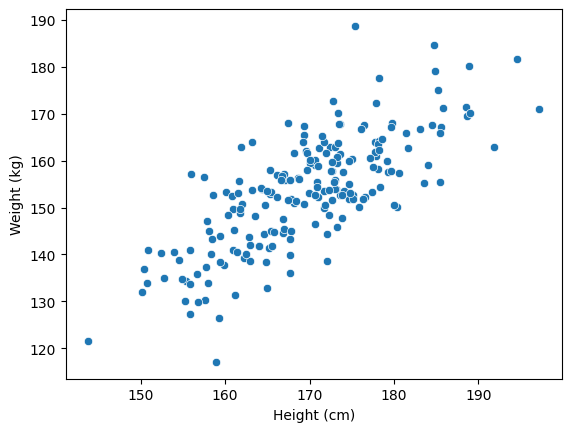

In [76]:
sns.scatterplot(data=df, x='Height_cm', y='Weight_kg')
plt.ylabel('Weight (kg)')
plt.xlabel('Height (cm)')   

In [77]:
## Correlation
df.corr()

,Height_cm,Weight_kg
Height_cm,1.000000,0.757812
Weight_kg,0.757812,1.000000


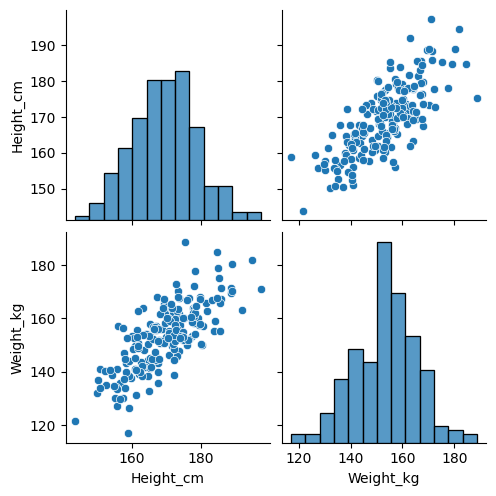

In [78]:
## Pairplot
sns.pairplot(df)

Linearly Correlated

In [79]:
# Independent and Dependent Features
x = df[['Height_cm']] # Independent Feature should be in 2D array or DataFrame with one column.
y = df['Weight_kg']  # Dependent Feature can be in 1D array or Series.

In [80]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [81]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
x_train = scaler.fit_transform(x_train)

In [83]:
x_test = scaler.transform(x_test)

In [84]:
# Applying simple linear regression
from sklearn.linear_model import LinearRegression

In [85]:
regression = LinearRegression(n_jobs=-1)

In [86]:
regression.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",-1
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [87]:
print("Coefficient or Slope:",regression.coef_) # or a 1-unit increase in X, the predicted Y changes by coef units, on average, assuming all other variables are constant.
print("Intercept:",regression.intercept_) # The intercept is the predicted value of Y when X = 0.

Coefficient or Slope: [9.37637096]
Intercept: 153.26466666666667


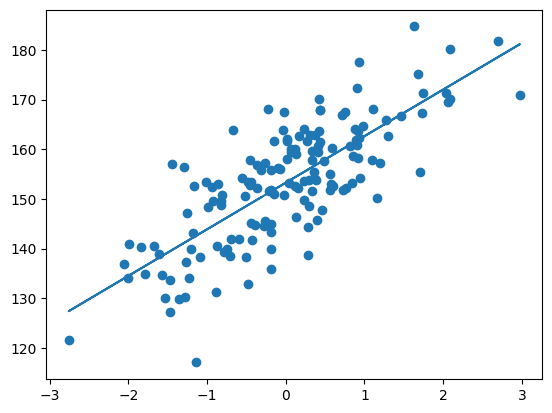

In [88]:
# Plot best fit line w.r.t training data
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train))

 - Predicted Height Output = intercept + coef(weight)
 - y_pred_test = 169.49 + 7.21(x_test)

In [89]:
# Prediction for test data
y_pred=regression.predict(x_test)

In [90]:
# Performance Metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [91]:
# Performance metrics calculation
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

68.77410702660896
6.167840830189538
8.293015556877302


In [92]:
# importing r2 score
from sklearn.metrics import r2_score

In [93]:
# Calculating r2_score
score = r2_score(y_test,y_pred)
print(score)


0.4957027004155993


In [94]:
# Calculating adjusted r2_score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.4851965066742576

### Using OLS

In [95]:
# Improting OLS linear regression
import statsmodels.api as sm

In [96]:
model = sm.OLS(y_train,x_train).fit()
prediction = model.predict(x_test)
print(prediction)

[-14.1740938   -5.12466054  -5.52685757 -11.45926382   1.51159052
   3.52257569  -6.02960387  -8.44278607   3.32147717  -6.73344867
  -0.19774687 -10.25267272   4.62861753   1.41104126   5.23191308
  15.08574041  -7.94003978  -6.33125164  15.38738819   4.12587124
   6.43850418  -9.64937717   5.73465937  -2.81202759  14.18079708
  -4.32026647  -7.638392    10.56102378  22.52638554 -10.15212346
   5.93575789  -8.64388458   9.85717897   8.75113713   3.0198294
  -1.1026902   16.09123299  -2.71147834  10.15882675   1.41104126
 -19.5032045    2.01433681 -12.86695344  -4.92356202  14.58299412
   4.42751901  -2.40983056 -13.67134751   2.31598459   9.75662971]


In [97]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Weight_kg   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.5563
Date:                Sun, 25 Jan 2026   Prob (F-statistic):                       0.457
Time:                        19:15:08   Log-Likelihood:                         -967.85
No. Observations:                 150   AIC:                                      1938.
Df Residuals:                     149   BIC:                                      1941.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [107]:
# Prediction for new data
regression.predict(scaler.transform([[185]]))

c:\Users\sharm\anaconda3\envs\ai-ml\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([168.85315337])

## Multiple Linear Regression

In [112]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2021,6,2.44,4.08,2735.49
1,2018,2,1.86,4.77,2870.33
2,2019,12,6.72,3.79,2637.06
3,2021,5,6.81,5.61,2577.33
4,2017,1,5.95,6.03,2678.74


In [115]:
# Dropping unnecessary feature
df_index.drop(columns=["year","month"],inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.44,4.08,2735.49
1,1.86,4.77,2870.33
2,6.72,3.79,2637.06
3,6.81,5.61,2577.33
4,5.95,6.03,2678.74


In [116]:
# checking for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

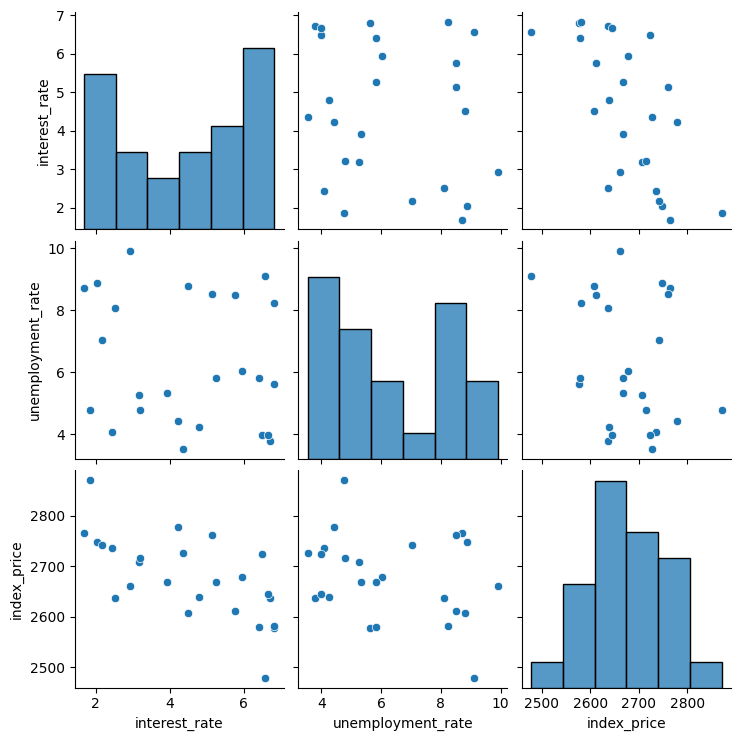

In [117]:
# Visualizing the data
sns.pairplot(df_index)

In [ ]:
# Correlation between the datapoints
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.170551,-0.663081
unemployment_rate,-0.170551,1.000000,-0.274782
index_price,-0.663081,-0.274782,1.000000


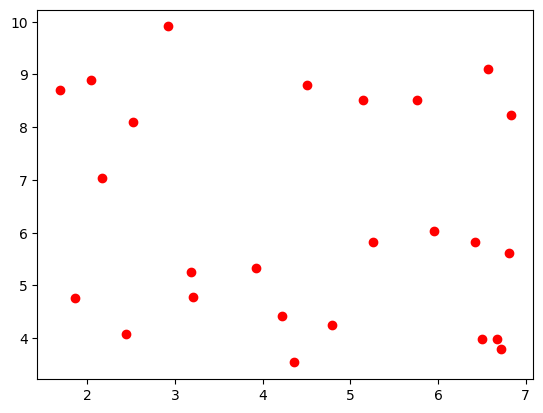

In [ ]:

plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color = 'r')

In [121]:
# Seperating the independent features
X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [122]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

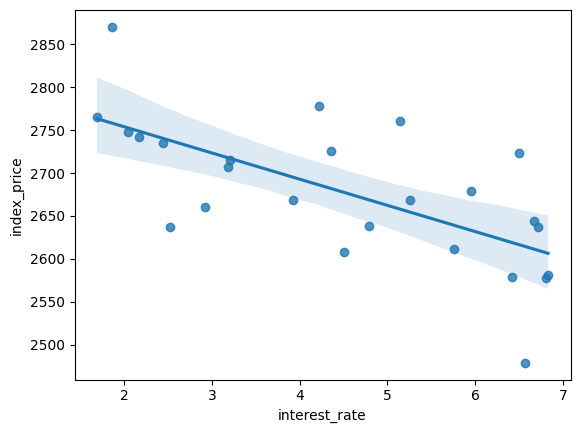

In [124]:
sns.regplot(x = df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

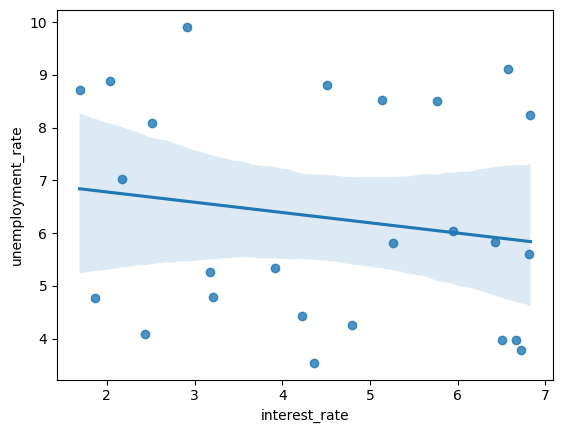

In [125]:
sns.regplot(x = df_index['interest_rate'],y=df_index['unemployment_rate'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

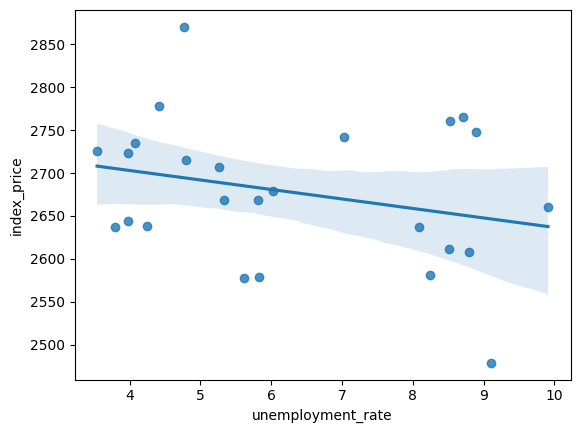

In [126]:
sns.regplot(x = df_index['unemployment_rate'],y=df_index['index_price'])

In [127]:
# standarization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Regression 
regression = LinearRegression()
regression.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [133]:
# Cross-Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)


In [134]:
print(validation_score)

[-2544.1117381  -2804.42107475 -6825.31598141]


In [135]:
np.mean(validation_score)

np.float64(-4057.94959808853)

In [136]:
# Prediction for test data
y_pred=regression.predict(X_test)

In [137]:
# Performance metrics calculation
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2437.184986763267
40.87198761714431
49.3678537791878


In [138]:
# Calculating r2_score
score = r2_score(y_test,y_pred)
print(score)
# Calculating adjusted r2_score
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)


-0.21642212323942545


-0.4597065478873106

### Assumption after Prediction


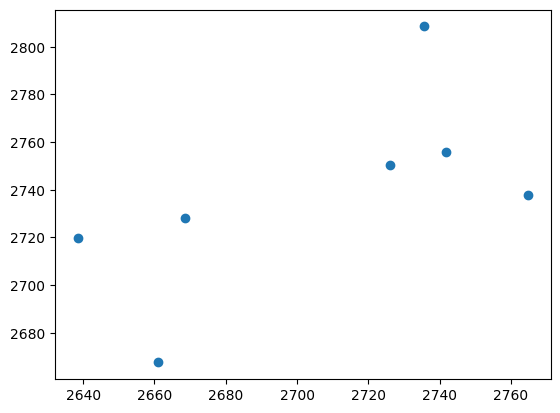

In [140]:
plt.scatter(y_test,y_pred)

8    -59.717530
16   -24.073991
0    -73.044164
23   -81.173483
11    27.310694
9    -14.140879
13    -6.643173
Name: index_price, dtype: float64


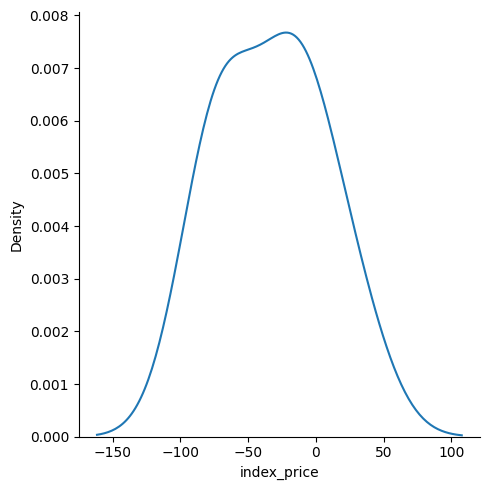

In [141]:
residuals = y_test - y_pred
print(residuals)
sns.displot(residuals,kind="kde")

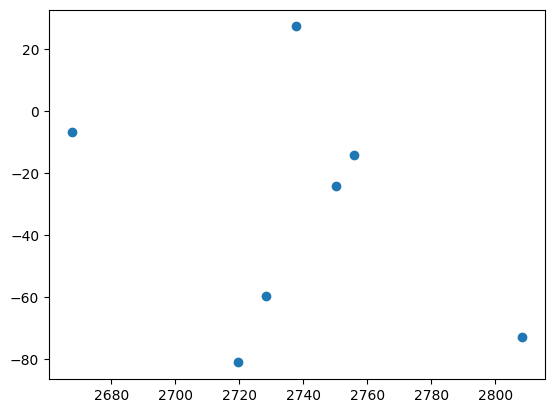

In [142]:
# Scatter plot wrt to residuals and prediction
plt.scatter(y_pred,residuals)

In [143]:
# OLS Multiple linear regression
model = sm.OLS(y_train,X_train).fit()

In [144]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.124
Method:                 Least Squares   F-statistic:                           0.005548
Date:                Sun, 25 Jan 2026   Prob (F-statistic):                       0.994
Time:                        21:05:54   Log-Likelihood:                         -167.54
No. Observations:                  18   AIC:                                      339.1
Df Residuals:                      16   BIC:                                      340.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -62.2121    671.011     -0.093      0.927   -1484.692    1360.268
x2           -40.2481    671.011     -0.060      0.953   -1462.728    1382.232
==============================================================================
Omnibus:                        3.279   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                1.639
Skew:                           0.714   Prob(JB):                        0.441
Kurtosis:                       3.385   Cond. No.                         1.12
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
print(regression.coef_)

[-62.21205407 -40.24805435]


## Polynomial Regression

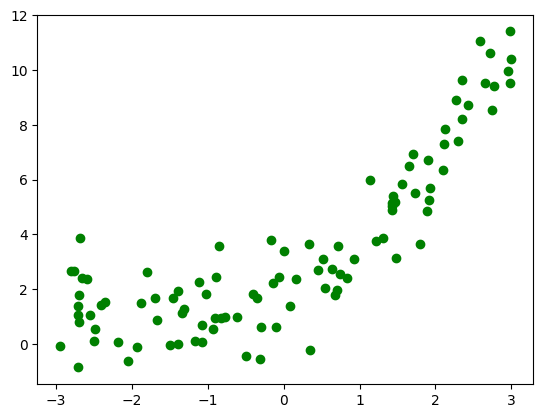

In [155]:
Xp = 6 * np.random.rand(100,1) - 3
yp = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1) # quadratic eauation used  y =0.5x^2 +1.5x+outliers
plt.scatter(X,y,color = 'g')


In [156]:
# train_test_split
Xp_train,Xp_test,yp_train,yp_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [157]:
# Regression 
regression_p = LinearRegression()
regression_p.fit(Xp_train,yp_train)
yp_pred=regression_p.predict(Xp_test)

In [158]:
# Calculating r2_score
score = r2_score(yp_test,yp_pred)
print(score)


0.5695075645932255


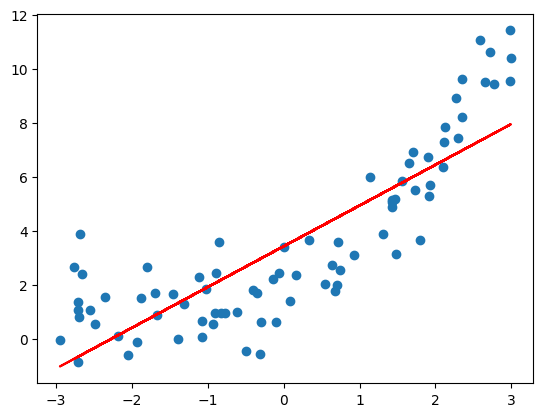

In [161]:
# Visulizing the polynomila problem model
plt.plot(Xp_train,regression_p.predict(Xp_train),color='r')
plt.scatter(Xp_train,yp_train)

In [162]:
# Applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [163]:
poly = PolynomialFeatures(degree=2,include_bias=True)
Xp_train_poly = poly.fit_transform(Xp_train)
Xp_test_poly = poly.transform(Xp_test)

In [165]:
regression_p.fit(Xp_train_poly,yp_train)
yp_pred = regression_p.predict(Xp_test_poly)
score = r2_score(yp_test,yp_pred)
print(score)

0.8550907995240109


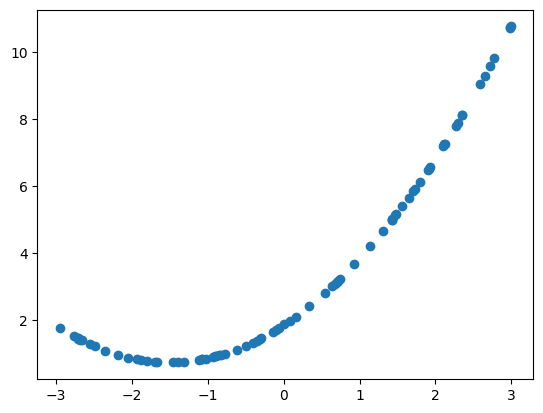

In [167]:
plt.scatter(Xp_train,regression_p.predict(Xp_train_poly))

In [168]:
# Prediction of new data set
Xp_new = np.linspace(-3,3,200).reshape(200,1)
Xp_new_poly = poly.transform(Xp_new)
Xp_new_poly 

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

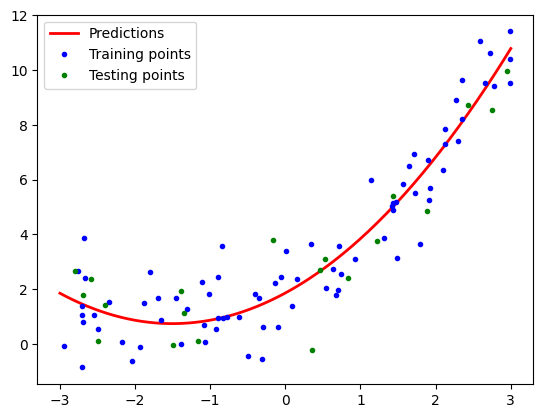

In [173]:
yp_new = regression_p.predict(Xp_new_poly)
plt.plot(Xp_new, yp_new, "r-" ,linewidth=2,label="Predictions" )
plt.plot(Xp_train, yp_train,"b. " , label='Training points')
plt.plot(Xp_test, yp_test, "g." , label='Testing points')
plt.legend()
plt.show()